# 10. Calculus, Continuity, and Topology

In [22]:
from sympy import Abs
from sympy import And
from sympy import Circle
from sympy import ConditionSet
from sympy import Eq
from sympy import Equivalent
from sympy import Function
from sympy import Implies
from sympy import Interval
from sympy import Max
from sympy import Point
from sympy import Reals
from sympy import sqrt
from sympy import symbols
from sympy.diffgeom import Manifold
from sympy.plotting import plot
from sympy.plotting import plot3d
from sympy.plotting import plot_implicit

from sympy import init_printing
init_printing(perm_cyclic = False)

In [23]:
delta, epsilon, x, a = symbols(r"\delta, \epsilon, x, a")
delta

In [24]:
epsilon

In [25]:
f = Function("f", real = True)
f

f

In [26]:
C = Implies(
    Abs(x - a) < delta,
    Abs(f(x) - f(a)) < epsilon
)
C # Class of continuous functions C where this always holds True

In [27]:
b, y = symbols("b y") # center
epsilon # radius
start = b - epsilon
end = b + epsilon
I_epsilon = Interval(start, end, True, True)
I_epsilon

In [28]:
I_epsilon_alt = ConditionSet(y, Abs(y - b) < epsilon, Reals)
I_epsilon_alt

In [29]:
Eq(I_epsilon, I_epsilon_alt)

In [30]:
I_epsilon_interval = I_epsilon.subs([(b, 2), (epsilon, 1)])
I_epsilon_interval

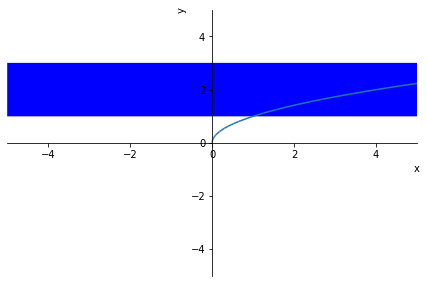

In [31]:
x = symbols("x")
f = sqrt

p1 = plot_implicit(
    And(y >= I_epsilon_interval.left, y <= I_epsilon_interval.right),
    x_var = x,
    show = False
)

p2 = plot(f(x), show = False)

p1.append(p2[0])
p1.show()

In [32]:
#inverse image of I under f
f = Function("f", real = True)
ConditionSet(x, I_epsilon.contains(f(x)), Reals)

In [33]:
x, y, a, b = symbols("x, y, a, b")

lft = Point(x, y).distance(Point(a, b))
p1 = sqrt((x - a)**2 + (y - b)**2)

Equivalent(lft, p1)

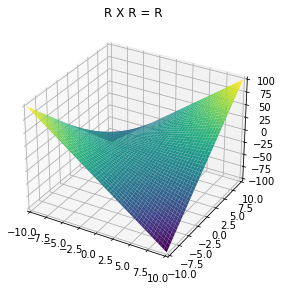

In [34]:
# Plotting R * R = R
r1, r2 = symbols("r1 r2")
plot3d(r1 * r2, title = "R X R = R")

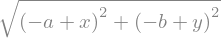

In [35]:
p1

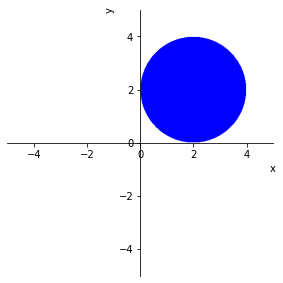

In [36]:
plot_implicit(p1.subs([(a, 2), (b, 2)]) < 2, aspect_ratio = (1, 1))

In [37]:
a, b, delta = symbols(r"a, b, \delta")

open_disc = Circle(Point(a, b), delta)
print(open_disc) # print because of sympy error #20577

Circle(Point2D(a, b), \delta)


In [38]:
Equivalent(
    open_disc,
    (x - a)**2 + (y - b)**2 < delta**2
)

In [39]:
# Shortest path along the rectangular grid:
p2 = abs(x - a) + abs(y - b)
p2

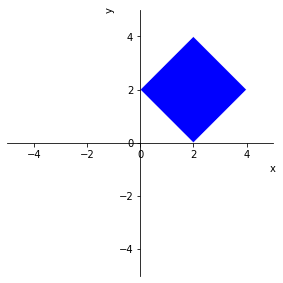

In [40]:
plot_implicit(p2.subs([(a, 2), (b, 2)]) < 2, aspect_ratio = (1, 1))

In [41]:
p3 = Max(abs(x - a), abs(y - b))
p3

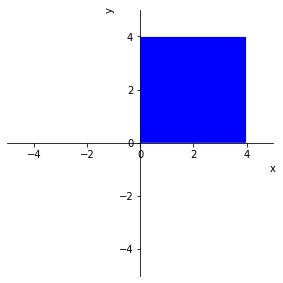

In [42]:
plot_implicit(p3.subs([(a, 2), (b, 2)]) < 2, aspect_ratio = (1, 1))

In [43]:
x = symbols("x")
f = Function("f", continuous = True)
g = Function("g", continuous = True)

gf = g(f(x))
gf

In [44]:
gf.continuous

True

In [45]:
X = Manifold("X", 2, structure = "topological")
Y = Manifold("Y", 2, structure = "topological")

class f(Function):
    @classmethod
    def eval(cls, x):
        return Y
    
result = f(X)
result